# Figure 1a, indel size distribution

In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
# load indels for all three crosses
callsets = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS & ~is_snp')

2016-03-08 18:07:31.159179 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.combined.final.npz
2016-03-08 18:07:31.455599 :: filter variants: excluding 15545 (36.8%) retaining 26699 (63.2%) of 42244 variants
2016-03-08 18:07:31.472262 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/hb3_dd2.combined.final.npz
2016-03-08 18:07:31.956316 :: filter variants: excluding 15335 (41.5%) retaining 21576 (58.5%) of 36911 variants
2016-03-08 18:07:31.971578 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/7g8_gb4.combined.final.npz
2016-03-08 18:07:32.458315 :: filter variants: excluding 14696 (42.3%) retaining 20079 (57.7%) of 34775 variants


In [3]:
# define a generic function for plotting an indel size histogram
def plot_indel_size_stacked_hist(ax, coding, major_step, minor_step, cross=None, minsize=-33, maxsize=33):
    
    # obtain variants array
    if cross:
        variants = callsets[cross]['variants']
    else:
        variants = np.concatenate([callsets[cross]['variants'] for cross in CROSSES]).view(np.recarray)
        
    # filter coding/non-coding
    if coding:
        variants = variants[variants.CDSAnnotationID != b'.']
    else:
        variants = variants[variants.CDSAnnotationID == b'.']
        
    # obtain indel sizes
    # N.B., there are some multiallelic variants, however all PASS variants are Mendelian
    # segregating, therefore any multiallelic implies both parents have non-reference alleles
    # and can determine relative indel size difference by subtraction of alt1 and alt2 indel sizes.
    # N.B., this also works for biallelic because the svlen array defaults to zero.
    svlen = variants.svlen[:, 0] - variants.svlen[:, 1]

    # obtain STR information
    is_str = variants.STR
        
    # prepare data series for plotting
    x = [svlen[~is_str], svlen[is_str]]

    # prepare axes
    sns.despine(ax=ax, offset=0, left=True)
    
    # plot histogram 
    ax.hist(x, 
            bins=np.arange(minsize, maxsize, 1), 
            histtype='bar', 
            stacked=1, 
            color=['w', 'k'], 
            edgecolor='k', 
            linewidth=.5, 
            alpha=1,
            align='left')
    
    # tidy up axes
    ax.set_xlabel('size (bp)')
    ax.xaxis.tick_bottom()
    ax.set_xlim(minsize-1, maxsize+1)
    major_locator = mpl.ticker.MultipleLocator(major_step)
    minor_locator = mpl.ticker.MultipleLocator(minor_step)
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.set_yticks([])
    
    return ax
    

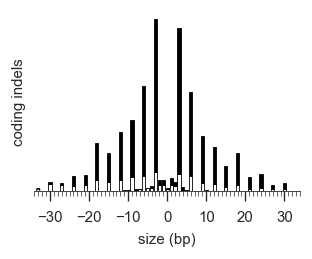

In [4]:
# plot coding indels
width = 8 * (1/3)
height = width / 1.2
fig, ax = plt.subplots(figsize=(width, height))
plot_indel_size_stacked_hist(ax, coding=True, major_step=10, minor_step=1, cross=None)
ax.set_ylabel('coding indels')
fig.tight_layout()
fig.savefig('../../artwork/main/fig1A1.jpeg', dpi=1200, jpeg_quality=100);

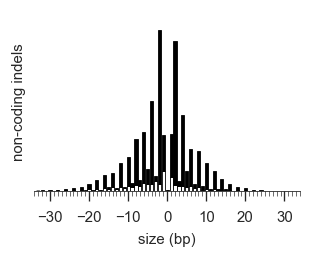

In [5]:
# plot non-coding indels
width = 8 * (1/3)
height = width / 1.2
fig, ax = plt.subplots(figsize=(width, height))
plot_indel_size_stacked_hist(ax, coding=False, major_step=10, minor_step=1, cross=None)
ax.set_ylabel('non-coding indels')
fig.tight_layout()
fig.savefig('../../artwork/main/fig1A2.jpeg', dpi=1200, jpeg_quality=100);

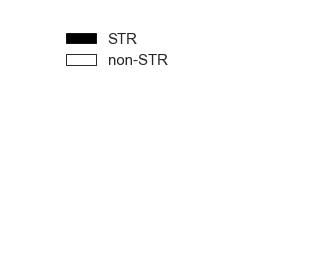

In [6]:
# plot legend
width = 8 * (1/3)
height = width / 1.2
fig, ax = plt.subplots(figsize=(width, height))
ax.set_axis_off()
p = plt.Rectangle((0, 0), 1, 1, fc="k")
q = plt.Rectangle((0, 0), 1, 1, fc="w")
ax.legend([p, q], ['STR', 'non-STR'], 
          ncol=1, loc='upper left', bbox_to_anchor=(0, 1))
fig.tight_layout()
fig.savefig('../../artwork/main/fig1A_legend.jpeg', dpi=1200, jpeg_quality=100);